In [1]:
# Import required libraries
import openslide
from openslide.deepzoom import DeepZoomGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2


main_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj"
SVS_dir = f"{main_dir}/SVS_Data"
labels_dir = f"{main_dir}/WSI_Breast_Cancer_Classification/Labels"
models_dir = f"{main_dir}/WSI_Breast_Cancer_Classification/Model_Weights"
Tiles_dir = f"{main_dir}/Tiles_Data"
Output_dir = f"{main_dir}/Output_Data"

svs_postive_file_names = ["1.svs", "DI-MH-694-08.svs", "DI-MH-694-01.svs"]
svs_negative_file_names = ["DI-MH-226-01.svs", "DI-MH-226-04.svs", "DI-MH-243-01.svs"]

svs_postive_file_paths = [f"{SVS_dir}/{svs_postive_file_names[0]}", f"{SVS_dir}/{svs_postive_file_names[1]}", 
                          f"{SVS_dir}/{svs_postive_file_names[2]}"]

svs_negative_file_paths = [f"{SVS_dir}/{svs_negative_file_names[0]}", f"{SVS_dir}/{svs_negative_file_names[1]}", 
                 f"{SVS_dir}/{svs_negative_file_names[2]}"]


In [25]:
def find_missing_files(labels_path, svs_directory, output_path):
    # Load the labels Excel file
    df = pd.read_excel(labels_path)
    df['ID'] = df['ID'].astype(str)

    # Append '.svs' to IDs to form the filenames
    df['filename'] = df['ID'] + '.svs'

    # Check if each file exists in the specified directory
    df['exists'] = df['filename'].apply(lambda x: os.path.isfile(os.path.join(svs_directory, x)))

    # Filter out entries for missing files
    missing_files_df = df[df['exists'] == False]

    # Display the missing files
    if not missing_files_df.empty:
        print("Missing files:")
        print(missing_files_df[['ID', 'filename']])
    else:
        print("No missing files.")
        # Filter the dataframe to only filtered_files_dfclude rows for existing files
    filtered_files_df = df[df['exists'] == True].drop(columns=['exists', 'filename']).loc[:,["ID","NMYC"]].reset_index(drop=True)

    # Save the filtered filtered_files_dfataFrame to a new Excel file
    filtered_files_df.to_excel(output_path, index=False)
    print(f"Filtered labels have been saved to {output_path}")
    print("Filtered Data:")
    print(filtered_files_df.head())
    return filtered_files_df
    

# Set paths and call the function
labels_file_path = f'{labels_dir}/final_labels_wsi.xlsx'  # Update with the path to your labels file
output_labels_path = f'{labels_dir}/filered_final_labels_wsi.xlsx'

filtered_files_df = find_missing_files(labels_file_path, SVS_dir, output_labels_path)


Missing files:
              ID          filename
2   DI-MH-694-07  DI-MH-694-07.svs
15  DI-MH-226-12  DI-MH-226-12.svs
17  DI-MH-226-14  DI-MH-226-14.svs
19  DI-MH-226-15  DI-MH-226-15.svs
25  DI-MH-243-09  DI-MH-243-09.svs
26  DI-MH-243-18  DI-MH-243-18.svs
27  DI-MH-694-02  DI-MH-694-02.svs
29  DI-MH-694-03  DI-MH-694-03.svs
Filtered labels have been saved to /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/WSI_Breast_Cancer_Classification/Labels/filered_final_labels_wsi.xlsx
Filtered Data:
             ID NMYC
0  DI-MH-694-08    p
1  DI-MH-694-09    p
2  DI-MH-694-06    p
3  DI-MH-694-05    p
4  DI-MH-226-01    n


Slide dimensions: (59759, 53035)
Number of levels: 4
Level dimensions: ((59759, 53035), (14939, 13258), (3734, 3314), (1867, 1657))
Level downsamples: (1.0, 4.0002135475638845, 16.003668195728046, 32.00733639145609)
The number of levels in the tiles object are:  17
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 4), (8, 7), (15, 13), (30, 26), (59, 52), (117, 104), (234, 208), (467, 415), (934, 829), (1868, 1658), (3735, 3315), (7470, 6630), (14940, 13259), (29880, 26518), (59759, 53035))


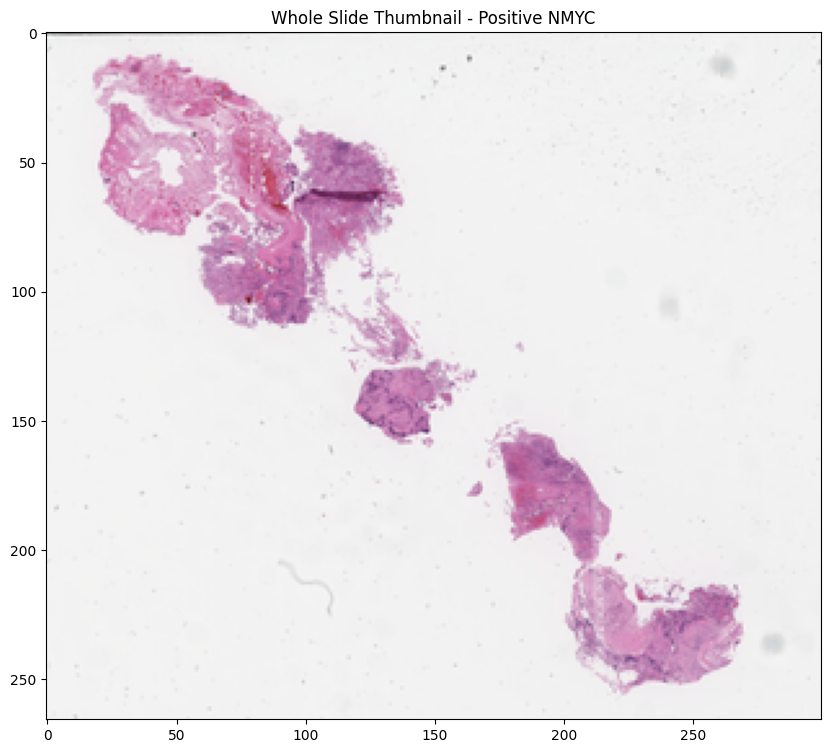

Slide dimensions: (137448, 74984)
Number of levels: 4
Level dimensions: ((137448, 74984), (34362, 18746), (8590, 4686), (2147, 1171))
Level downsamples: (1.0, 4.0, 16.001319264228968, 64.02639474300724)
The number of levels in the tiles object are:  19
The dimensions of data in each level are:  ((1, 1), (2, 1), (3, 2), (5, 3), (9, 5), (17, 10), (34, 19), (68, 37), (135, 74), (269, 147), (537, 293), (1074, 586), (2148, 1172), (4296, 2344), (8591, 4687), (17181, 9373), (34362, 18746), (68724, 37492), (137448, 74984))


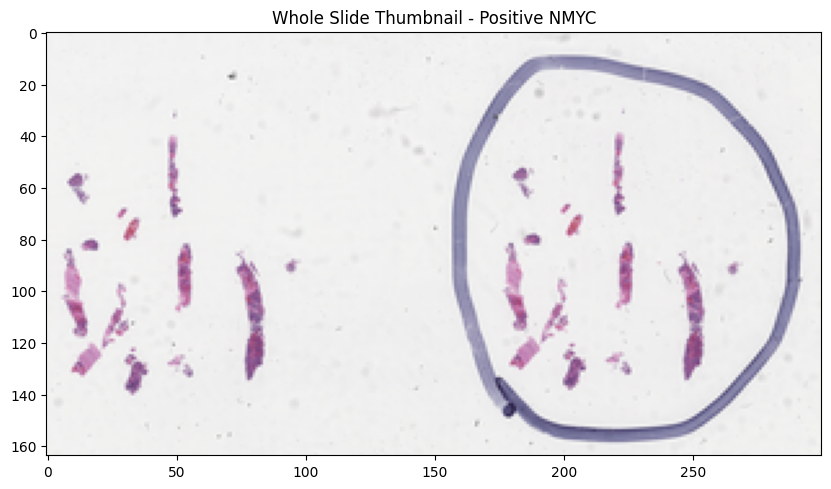

Slide dimensions: (107567, 64022)
Number of levels: 4
Level dimensions: ((107567, 64022), (26891, 16005), (6722, 4001), (3361, 2000))
Level downsamples: (1.0, 4.000118261219338, 16.001865551910146, 32.00773147872657)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 1), (4, 2), (7, 4), (14, 8), (27, 16), (53, 32), (106, 63), (211, 126), (421, 251), (841, 501), (1681, 1001), (3362, 2001), (6723, 4002), (13446, 8003), (26892, 16006), (53784, 32011), (107567, 64022))


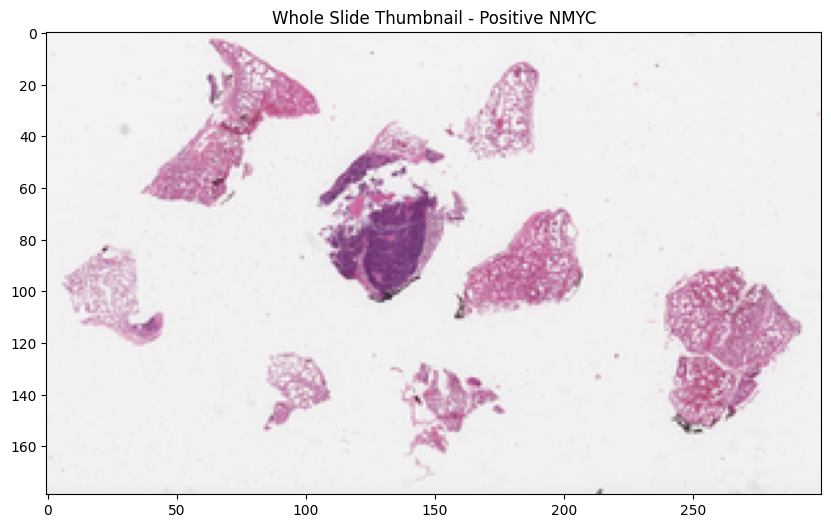

Slide dimensions: (89639, 74238)
Number of levels: 4
Level dimensions: ((89639, 74238), (22409, 18559), (5602, 4639), (2801, 2319))
Level downsamples: (1.0, 4.0001208196047084, 16.00213372275892, 32.00771785903483)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (3, 3), (6, 5), (11, 10), (22, 19), (44, 37), (88, 73), (176, 145), (351, 290), (701, 580), (1401, 1160), (2802, 2320), (5603, 4640), (11205, 9280), (22410, 18560), (44820, 37119), (89639, 74238))


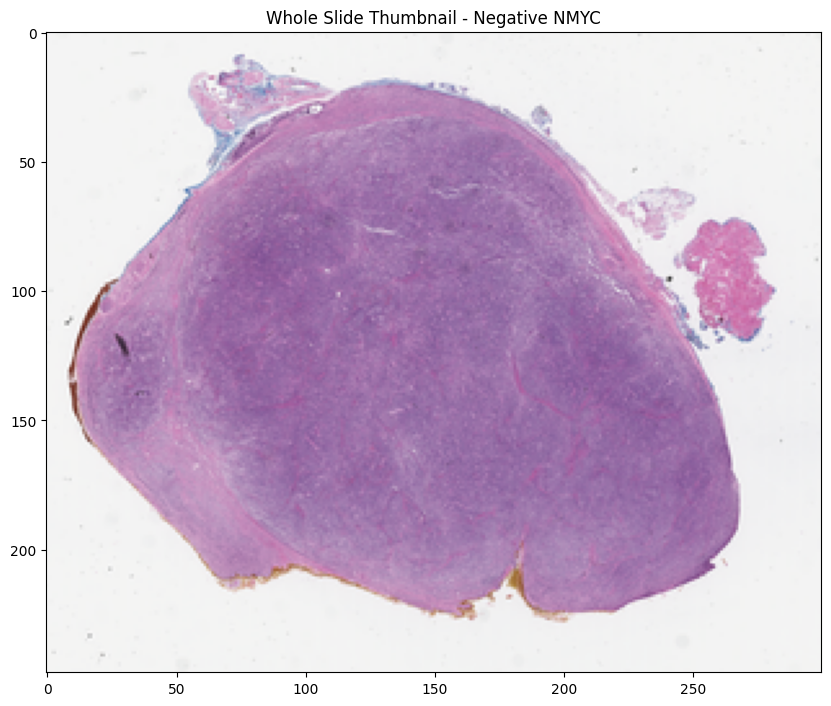

Slide dimensions: (129480, 91291)
Number of levels: 4
Level dimensions: ((129480, 91291), (32370, 22822), (8092, 5705), (4046, 2852))
Level downsamples: (1.0, 4.000065726053808, 16.001458381981447, 32.00572215108302)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 3), (8, 6), (16, 12), (32, 23), (64, 45), (127, 90), (253, 179), (506, 357), (1012, 714), (2024, 1427), (4047, 2853), (8093, 5706), (16185, 11412), (32370, 22823), (64740, 45646), (129480, 91291))


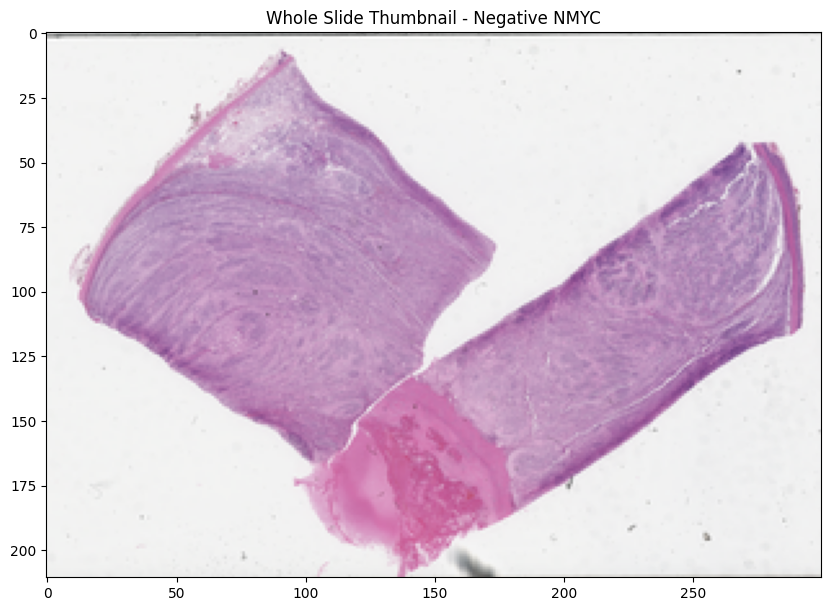

Slide dimensions: (115536, 86868)
Number of levels: 4
Level dimensions: ((115536, 86868), (28884, 21717), (7221, 5429), (3610, 2714))
Level downsamples: (1.0, 4.0, 16.000368391969054, 32.005900664860775)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 3), (8, 6), (15, 11), (29, 22), (57, 43), (113, 85), (226, 170), (452, 340), (903, 679), (1806, 1358), (3611, 2715), (7221, 5430), (14442, 10859), (28884, 21717), (57768, 43434), (115536, 86868))


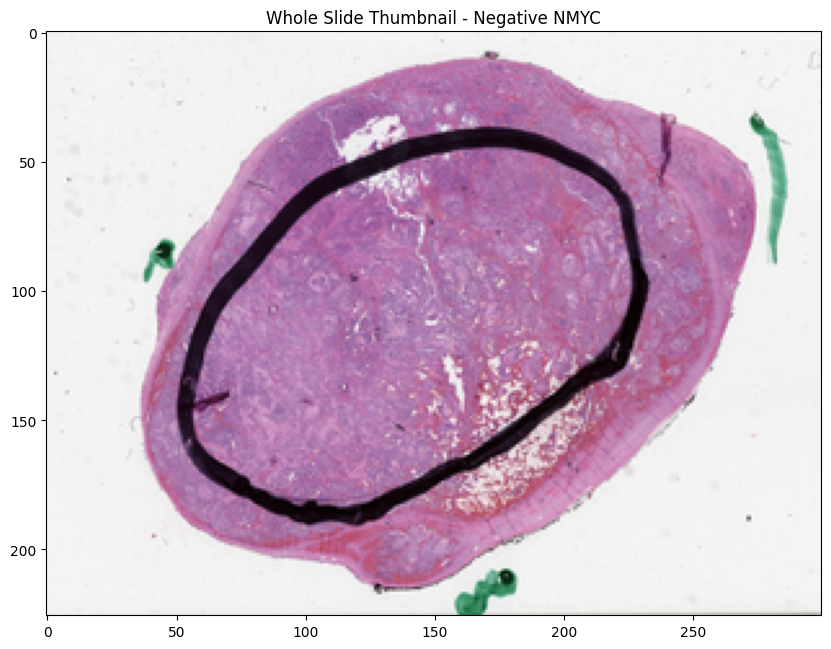

In [29]:
# Function to load an SVS file and show its properties
def load_and_display_info(svs_path,group):
    slide = openslide.OpenSlide(svs_path)
    print("Slide dimensions:", slide.dimensions)
    print("Number of levels:", slide.level_count)
    print("Level dimensions:", slide.level_dimensions)
    print("Level downsamples:", slide.level_downsamples)
    tiles = DeepZoomGenerator(slide, tile_size=224, overlap=0, limit_bounds=False)
    
    print("The number of levels in the tiles object are: ", tiles.level_count)
    print("The dimensions of data in each level are: ", tiles.level_dimensions)
    
    # Display a thumbnail of the whole slide
    plt.figure(figsize=(10, 10))
    plt.imshow(slide.get_thumbnail(size=(300, 300)))
    plt.title(f"Whole Slide Thumbnail - {group}")
    plt.show()
    
    return slide

# Load example slides

for file_path in svs_postive_file_paths:
    slide = load_and_display_info(file_path, group="Positive NMYC")

for file_path in svs_negative_file_paths:
    slide = load_and_display_info(file_path, group="Negative NMYC")

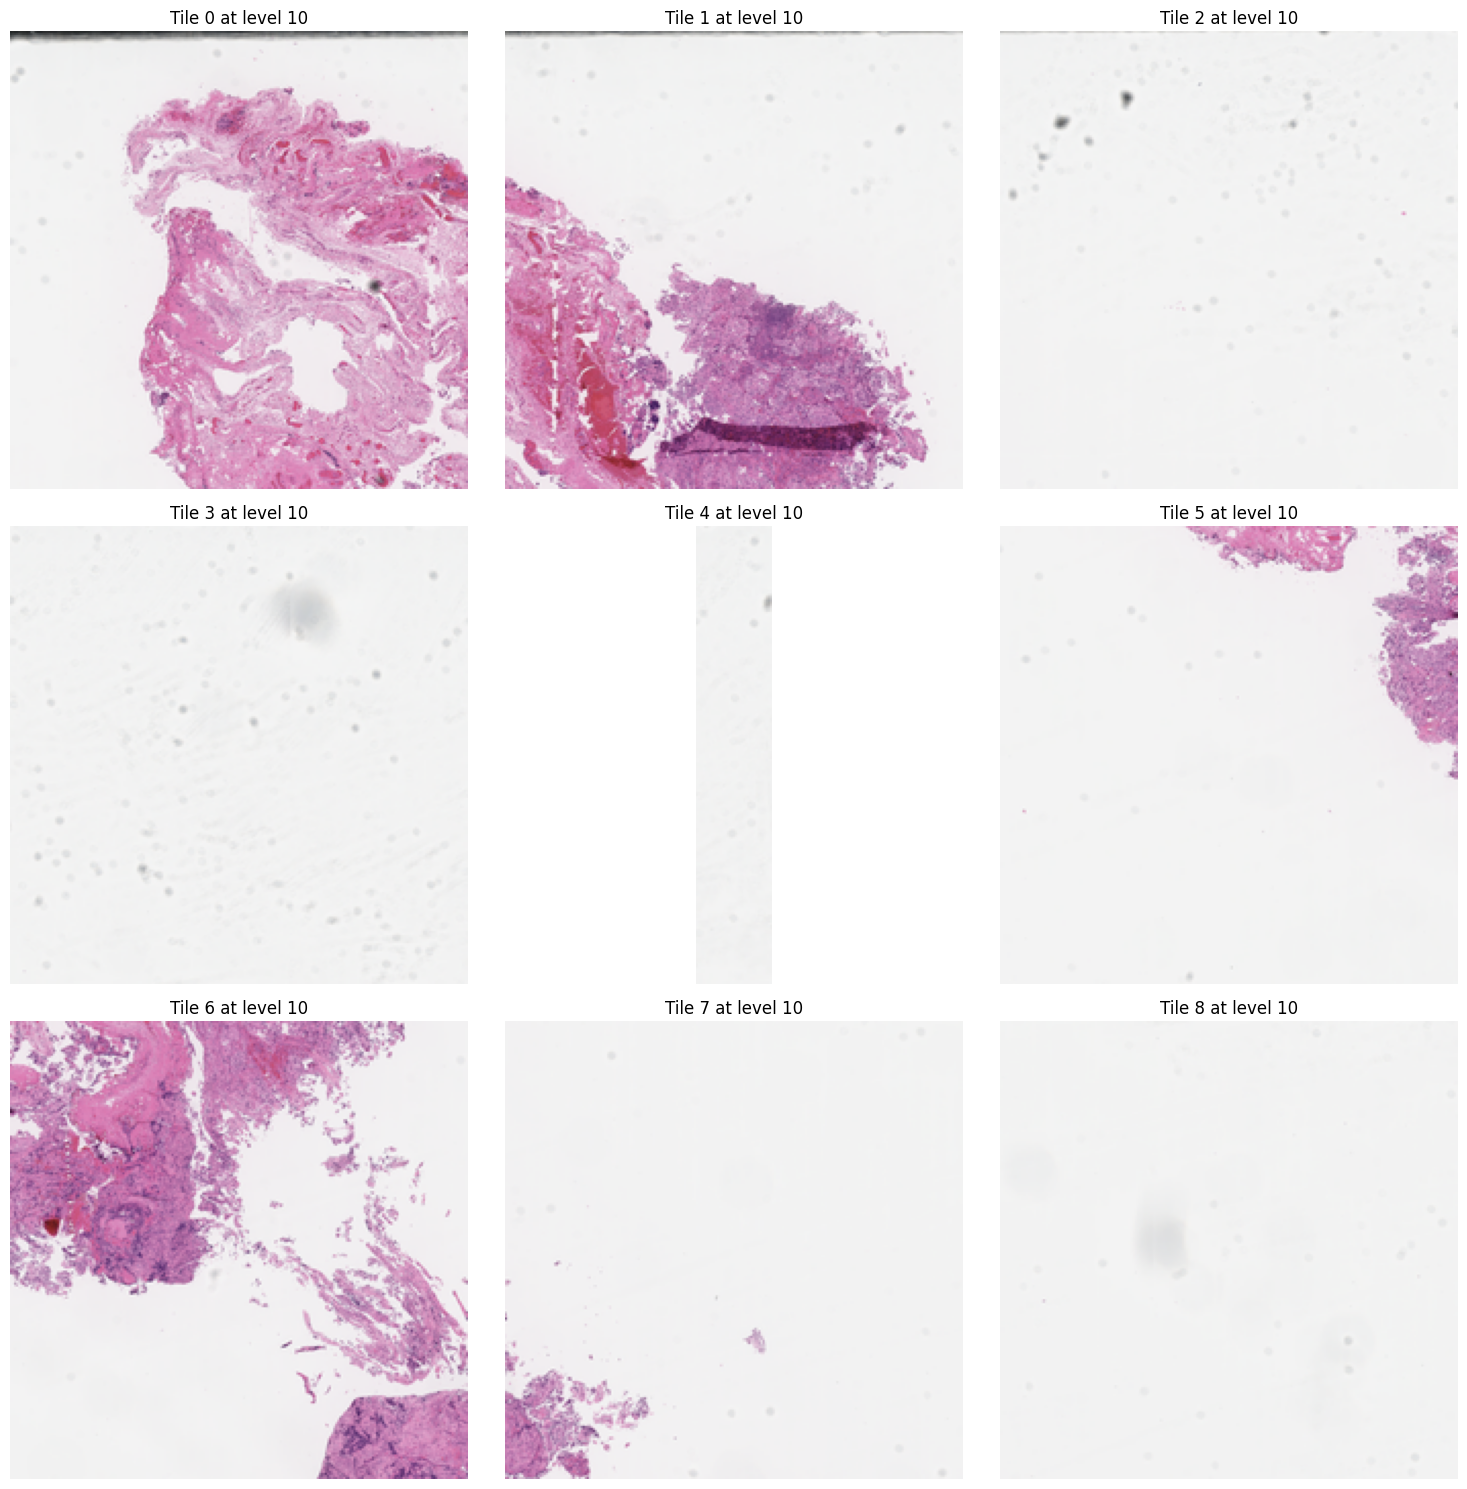

In [49]:

# Function to create a tile generator and extract tiles from a specified level
def create_and_display_tiles(slide, level, tile_size=224):
    dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=0, limit_bounds=True)
    cols, rows = dzi.level_tiles[level]
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    
    for i, ax in enumerate(axs.flatten()):
        if i < cols * rows:
            col, row = i % cols, i // cols
            tile = dzi.get_tile(level, (col, row))
            ax.imshow(tile)
            ax.set_title(f"Tile {i} at level {level}")
            ax.axis('off')
        plt.tight_layout()
        
    return dzi

# Create tiles at a specific level and display them
level_to_extract = 10  # choose a suitable level
tile_generator = create_and_display_tiles(openslide.OpenSlide(svs_file_paths[0]), level_to_extract)



In [30]:
def calculate_total_tiles(svs_path, tile_size=256, overlap=0):
    slide = openslide.OpenSlide(svs_path)
    total_tiles = 0

    print(f"Levels: {slide.level_count}")
    for level in range(slide.level_count):
        dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=overlap, limit_bounds=True)
        cols, rows = dzi.level_tiles[level]
        num_tiles = cols * rows
        total_tiles += num_tiles
        print(f"Level {level} ({slide.level_dimensions[level]}): {num_tiles} tiles")

    print(f"Total tiles across all levels: {total_tiles}")

calculate_total_tiles(svs_negative_file_paths[2])

Levels: 4
Level 0 ((115536, 86868)): 1 tiles
Level 1 ((28884, 21717)): 1 tiles
Level 2 ((7221, 5429)): 1 tiles
Level 3 ((3610, 2714)): 1 tiles
Total tiles across all levels: 4


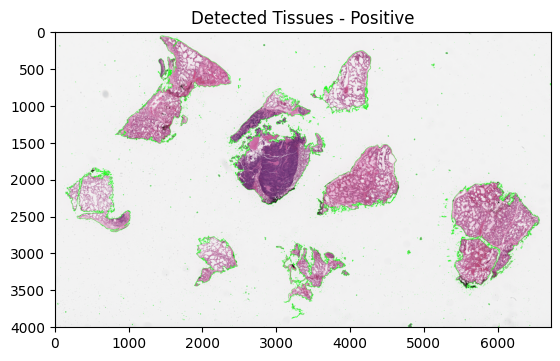

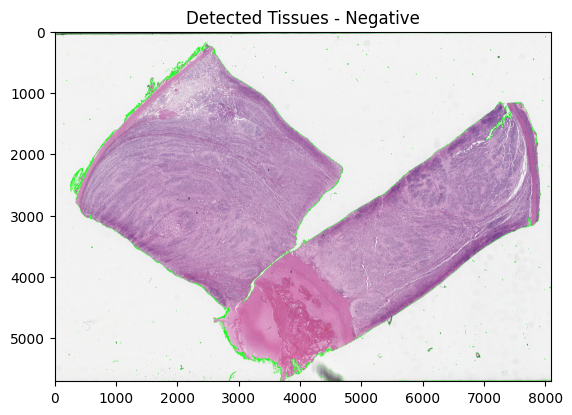

In [35]:
def process_slide(slide_path, group, level=2):
    slide = openslide.OpenSlide(slide_path)
    
    # Read a region from the slide: starting at the upper left corner of level 2
    thumbnail = slide.read_region((0, 0), level, slide.level_dimensions[level])
    thumbnail = np.array(thumbnail)  # Convert to array

    # Ensure only three channels (RGB, discarding alpha if present)
    if thumbnail.shape[-1] == 4:
        thumbnail = thumbnail[:, :, :3]

    # Convert to BGR for OpenCV processing
    thumbnail = cv2.cvtColor(thumbnail, cv2.COLOR_RGB2BGR)

    # Convert to grayscale and threshold
    gray = cv2.cvtColor(thumbnail, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours
    cv2.drawContours(thumbnail, contours, -1, (0, 255, 0), 2)  # Drawing in BGR format
    
    # Convert back to RGB for displaying with matplotlib
    thumbnail = cv2.cvtColor(thumbnail, cv2.COLOR_BGR2RGB)

    plt.imshow(thumbnail)
    plt.title(f'Detected Tissues - {group}')
    plt.show()


process_slide(svs_postive_file_paths[2], group="Positive", level=2)
process_slide(svs_negative_file_paths[1], group="Negative", level=2)


In [9]:
import cv2
import numpy as np
from skimage import feature, color
from skimage.feature import graycomatrix, local_binary_pattern,graycoprops

def calculate_lbp_features(image, radius=3, n_points=24):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

def calculate_glcm_features(image):
    gray_image = color.rgb2gray(image)
    glcm = graycomatrix((gray_image * 255).astype('uint8'), distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    return contrast

def is_informative(tile, lbp_threshold=0.1, contrast_threshold=10):
    lbp_features = calculate_lbp_features(tile)
    glcm_contrast = calculate_glcm_features(tile)
    
    if np.max(lbp_features) > lbp_threshold and glcm_contrast > contrast_threshold:
        return True
    return False

# Example of use
tile_img = cv2.imread(f"{Output_dir}/a/SUB_DI-MH-226-04.svs_tile_(1_0).png") 
if is_informative(tile_img):
    print("Tile is informative and will be processed.")
else:
    print("Tile is non-informative and will be skipped.")


Tile is informative and will be processed.


In [26]:
import cv2
import numpy as np
from scipy.stats import kurtosis, skew

def analyze_color_histogram(image):
    # Convert image to HSV for more meaningful color analysis
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    color_features = []
    
    # Calculate histograms for each channel in the HSV image
    for i in range(3):  # HSV channels
        hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        color_features.extend([np.max(hist), skew(hist), kurtosis(hist)])
    
    return color_features

def is_informative_color_analysis(tile, thresholds):
    features = analyze_color_histogram(tile)
    # Decision logic based on thresholds and features
    for feature, threshold in zip(features, thresholds):
        if feature < threshold:
            return False
    return True

# Testing the function
tile_img = cv2.imread(f"{Output_dir}/a/SUB_DI-MH-226-04.svs_tile_(7_0).png") 
thresholds = [0.05, 0.05, 0.01, 0.05, 0.1, 0.1]  # Example thresholds for max, skew, and kurtosis

if is_informative_color_analysis(tile_img, thresholds):
    print("Tile is informative and will be processed.")
else:
    print("Tile is non-informative and will be skipped.")


Tile is informative and will be processed.


In [ ]:
from skimage.measure import shannon_entropy
from skimage import filters

def is_low_contrast_and_edges(tile, edge_threshold=100, contrast_threshold=0.005):
    """Check if the tile is low in contrast or has insufficient edges."""
    gray = cv2.cvtColor(tile, cv2.COLOR_RGB2GRAY)
    
    # Check for low contrast
    if np.max(gray) - np.min(gray) < contrast_threshold * 255:
        return True
    
    # Edge detection using Sobel operator
    edges = filters.sobel(gray)
    if np.sum(edges > 0.01) < edge_threshold:  # Threshold on edge magnitude and count
        return True
    
    return False

def is_empty_tile(tile, std_dev_threshold=10, entropy_threshold=3.5):
    gray = cv2.cvtColor(tile, cv2.COLOR_RGB2GRAY)
    if np.std(gray) < std_dev_threshold or shannon_entropy(gray) < entropy_threshold:
        return True
    # Additional check for color dominance
    if np.mean(tile, axis=(0, 1))[0] > 200:  # Adjust based on your data
        return True
    return False

def process_tile(tile):
    # Convert to grayscale and apply Gaussian blur to reduce noise
    gray = cv2.cvtColor(tile, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply Otsu's threshold to create a binary image
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to clarify the image
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Distance transformation
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Thresholding to get the sure foreground (cell regions)
    _, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Finding unknown region (border between cells)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply the Watershed Algorithm
    markers = cv2.watershed(tile, markers)
    tile[markers == -1] = [255, 0, 0]  # Draw boundaries in red

    # Draw contours for each segment
    for label in np.unique(markers):
        if label == 1:
            continue  # Skip background
        mask = np.zeros(gray.shape, dtype=np.uint8)
        mask[markers == label] = 255
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(tile, contours, -1, (0, 255, 0), 2)  # Draw in green

    return tile

def process_slide(slide_path,slide_name, Output_dir,level=0, tile_size=(800, 800)):
    slide = openslide.OpenSlide(slide_path)

    # Determine the number of tiles
    dims = slide.level_dimensions[level]
    x_tiles = dims[0] // tile_size[0]
    y_tiles = dims[1] // tile_size[1]
    print("Number of tiles: ", x_tiles*y_tiles)

    slide_save_dir = f"{Output_dir}/{slide_name}_test"
    if not os.path.exists(slide_save_dir):
        os.makedirs(slide_save_dir)
    # Process each tile
    for x in range(x_tiles):
        for y in range(y_tiles):
            x_coord = x * tile_size[0]
            y_coord = y * tile_size[1]
            tile = slide.read_region((x_coord, y_coord), level, tile_size)
            tile = np.array(tile.convert('RGB'))
            if not (is_empty_tile(tile) or is_low_contrast_and_edges(tile)):
                processed_tile = process_tile(tile)
                cv2.imwrite(f"{slide_save_dir}/SUB_{slide_name}_tile_({x}_{y}).png", processed_tile)
            # plt.imshow(processed_tile)
            # plt.title(f'Tile ({x}, {y}) Processed')
            # plt.show()



def main(slide_dir, output_dir, level=0, patch_size=512, overlap=0):
    """
    Process all slides in a directory.

    Parameters:
        slide_dir (str): Directory containing .svs files.
        output_dir (str): Directory to save output patches.
        level (int): Level of WSI to process.
        patch_size (int): Size of each patch.
        overlap (int): Overlap between patches.
    """
    for slide_path in os.listdir(slide_dir):
        if slide_path.endswith('.svs'):
            slide_name = os.path.splitext(slide_path)[0]
            print(f"Processing {slide_path} at level {level}...")
            process_slide(slide_path=f"{slide_dir}/{slide_path}", slide_name=slide_name, Output_dir=Output_dir)
            print(f"Saved preprocessed tiles for {slide_name}.")

process_slide(slide_path=svs_negative_file_paths[1], slide_name=svs_negative_file_names[1], Output_dir=Output_dir)
# main(SVS_dir,Output_dir)


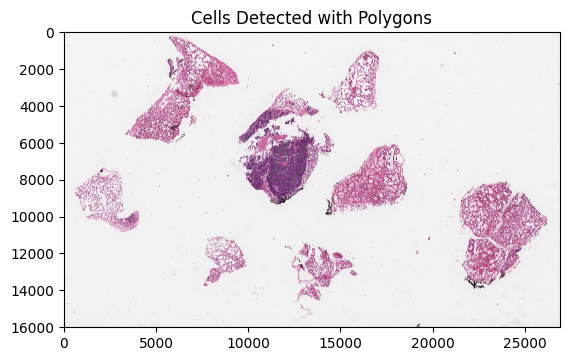

In [46]:
def process_slide(slide_path, level=3, display=False):
    # Open the whole slide image
    slide = openslide.OpenSlide(slide_path)

    # Read a region from the slide: starting at the upper left corner of specified level
    thumbnail = slide.read_region((0, 0), level, slide.level_dimensions[level])
    thumbnail = np.array(thumbnail.convert('RGB'))  # Convert to RGB numpy array

    # Pre-processing for cell detection
    gray = cv2.cvtColor(thumbnail, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal using morphological closing
    kernel = np.ones((3,3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Background area using Dilation
    sure_bg = cv2.dilate(closing, kernel, iterations=3)

    # Finding sure foreground area using Distance Transform and thresholding
    dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Mark the region of unknown with zero
    markers[unknown == 255] = 0

    # Apply the Watershed Algorithm to find the boundaries
    markers = cv2.watershed(thumbnail, markers)
    thumbnail[markers == -1] = [255, 0, 0]  # Draw boundaries in red

    # Draw contours around each cell
    for marker in np.unique(markers):
        if marker == 0 or marker == 1:
            continue  # Background or border
        # Create a mask for the current cell marker
        mask = np.zeros(gray.shape, dtype=np.uint8)
        mask[markers == marker] = 255
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(thumbnail, contours, -1, (0, 255, 0), 2)  # Draw in green

    if display:
        plt.imshow(thumbnail)
        plt.title('Cells Detected with Polygons')
        plt.show()

    return thumbnail


thumbnail = process_slide(svs_postive_file_paths[2], level=1, display=True)


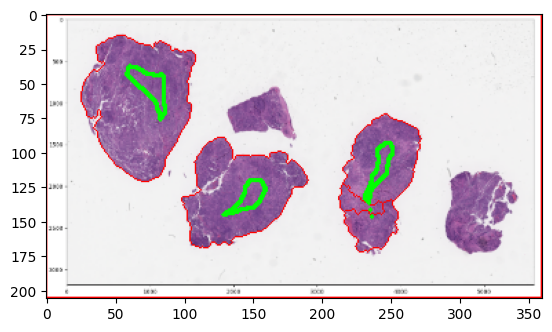

In [8]:
def process_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    
    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal and separation of touching objects
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area (distance transform)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    # Watershed
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255,0,0]  # Mark boundaries in red

    # Draw polygons
    contours, _ = cv2.findContours(sure_fg.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0,255,0), 2)

    plt.imshow(image)
    plt.show()

# Assuming 'image (1).png' is the path to the image you uploaded
process_image(f'{main_dir}/Preprocessed_slide.png')


In [ ]:
def extract_patches(slide, level=2, patch_size=512, overlap=0):
    """
    Extract patches from a specific level within a WSI.

    Parameters:
        slide (OpenSlide): OpenSlide object.
        level (int): The level of the slide to process.
        patch_size (int): Size of the patch (patch_size x patch_size).
        overlap (int): Overlap between patches in pixels.

    Returns:
        List of image patches as PIL images.
    """
    patches = []
    
    level_dimension = slide.level_dimensions[level]
    level_downsample = slide.level_downsamples[level]
    step_size = patch_size - overlap
    
    for y in range(0, level_dimension[1], step_size):
        for x in range(0, level_dimension[0], step_size):
            patch = slide.read_region((int(x * level_downsample), int(y * level_downsample)), 0, (patch_size, patch_size))
            patches.append(patch.convert('RGB'))  # Convert to RGB
    return patches

def save_patches(patches, save_dir, slide_name):
    """
    Save each patch to the filesystem.

    Parameters:
        patches (list): List of PIL Images.
        save_dir (str): Directory to save patches.
        slide_name (str): Base name of the slide to use in naming patches.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i, patch in enumerate(patches):
        patch.save(os.path.join(save_dir, f"{slide_name}_patch_{i}.png"))

def process_slides(slide_dir, output_dir, level=2, patch_size=512, overlap=0):
    """
    Process all slides in a directory.

    Parameters:
        slide_dir (str): Directory containing .svs files.
        output_dir (str): Directory to save output patches.
        level (int): Level of WSI to process.
        patch_size (int): Size of each patch.
        overlap (int): Overlap between patches.
    """
    for slide_path in os.listdir(slide_dir):
        if slide_path.endswith('.svs'):
            slide_name = os.path.splitext(slide_path)[0]
            slide = OpenSlide(os.path.join(slide_dir, slide_path))
            print(f"Processing {slide_path} at level {level}...")
            for level in range(slide.level_count):
                patches = extract_patches(slide, level, patch_size, overlap)
                save_patches(patches, os.path.join(output_dir, slide_name), slide_name)
                print(f"Saved patches for {slide_path}.")


# Process all slides
process_slides(SVS_dir, Tiles_dir, patch_size=512, overlap=50)


In [ ]:
def load_labels(file_path):
    return pd.read_excel(file_path)

def extract_tiles(svs_path, label, output_dir, tile_size=256, overlap=0, white_threshold=235):
    try:
        slide = openslide.OpenSlide(svs_path)
        base_filename = os.path.splitext(os.path.basename(svs_path))[0]
        print(f"Processing {svs_path} with {slide.level_count} levels.")

        for level in range(slide.level_count):
            dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=overlap, limit_bounds=True)
            cols, rows = dzi.level_tiles[level]
            print(f"Level {level}: {cols}x{rows} tiles")

            # Create directories for each level under their respective labels
            level_dir = os.path.join(output_dir, label, base_filename, f"Level_{level}")
            os.makedirs(level_dir, exist_ok=True)

            tile_count = 0
            for col in range(cols):
                for row in range(rows):
                    tile = dzi.get_tile(level, (col, row))
                    tile_np = np.array(tile)
                    if np.mean(tile_np) < white_threshold and np.std(tile_np) > 20:  # Filter out blank tiles
                        tile_filename = f"tile_{col}_{row}.png"
                        tile.save(os.path.join(level_dir, tile_filename))
                        tile_count += 1

            print(f"Saved {tile_count} tiles from {svs_path} at level {level}")

    except openslide.OpenSlideUnsupportedFormatError:
        print(f"Unsupported format for file {svs_path}")
    except Exception as e:
        print(f"Error processing {svs_path}: {e}")

def main(labels_file, svs_directory, output_directory):
    labels_df = load_labels(labels_file)
    
    for _, row in labels_df.iterrows():
        svs_filename = f"{row['ID'].split(' ')[0]}.svs"
        svs_path = os.path.join(svs_directory, svs_filename)
        if os.path.exists(svs_path):
            extract_tiles(svs_path, row['NMYC'], output_directory)
        else:
            print(f"File not found: {svs_path}")


main(output_labels_path, SVS_dir, Tiles_dir)  # Specify desired level
